In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('Employee.csv')
df.shape


(148, 6)

In [5]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
# delete duplicate rows

In [6]:
df.duplicated().sum()

np.int64(4)

In [7]:
df.drop_duplicates(inplace=True)
df.shape
# 4 duplicates removed 

(144, 6)

In [8]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [10]:
df = pd.read_csv('employee.csv')  # Replace with your actual file name


In [11]:
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [12]:
#Outlier detection
#using IQR
#Chances of getting outliers are only in the 'Age' and 'Salary' columns.

In [13]:
df1=pd.read_csv('Employee.csv')

In [14]:
df1.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [15]:
#Outlier detection in 'Age' column=IQR

In [16]:
q1=df['Age'].quantile(0.25)
q1

np.float64(22.0)

In [17]:
q3=df['Age'].quantile(0.75)
q3

np.float64(37.75)

In [18]:
iqr=q3-q1
iqr

np.float64(15.75)

In [19]:
lower=q1-1.5*iqr
lower

np.float64(-1.625)

In [20]:
upper=q3+1.5*iqr
upper

np.float64(61.375)

In [21]:
#outlier rows
df[(df['Age']<lower) & (df['Age']>upper)]
#no outliers detected using IQR. But Age=0 is an outlier.

,Company,Age,Salary,Place,Country,Gender


In [23]:
#Outlier detection in 'Salary' column=IQR

In [24]:
q1=df['Salary'].quantile(0.25)
q1


np.float64(3030.0)

In [25]:
q3=df['Salary'].quantile(0.75)
q3

np.float64(8000.0)

In [26]:
iqr=q3-q1
iqr

np.float64(4970.0)

In [27]:

lower=q1-1.5*iqr
lower


np.float64(-4425.0)

In [28]:
upper=q3+1.5*iqr
upper


np.float64(15455.0)

In [29]:
#outlier rows
df[(df['Salary']<lower) & (df['Salary']>upper)]
#no outliers detected using IQR.

,Company,Age,Salary,Place,Country,Gender


In [30]:

#Treat missing values

In [31]:
df.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [32]:
# For the 'Company' column we have rows with 'nan' values. It should be replacedby mode()-most repeated value, "TCS"

In [33]:
df['Company'].mode()[0]

'TCS'

In [35]:
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])


In [36]:
df.isna().sum()

Company     0
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [37]:
#treat 'Age' column
# replace the value'0' in Age as 'NaN'
# For the 'Age' column, fillna by mean value


In [38]:
df[df['Age']==0]


,Company,Age,Salary,Place,Country,Gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


In [40]:
df['Age'] = df['Age'].replace(0, np.nan)



In [41]:
df.isna().sum()

Company     0
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [42]:
df.describe()
#now the minimum value for 'Age' is 17 and max is 54 (no outliers). so replace the null values using mean()

,Age,Salary,Gender
count,124.000000,124.000000,148.000000
mean,31.959677,5312.467742,0.222973
std,9.034171,2573.764683,0.417654
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [43]:
rounded_mean=round(df['Age'].mean(),0)
rounded_mean

np.float64(32.0)

In [45]:
df['Age'] = df['Age'].fillna(rounded_mean)


In [46]:
df.isna().sum()

Company     0
Age         0
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [47]:
rounded_salary=round(df['Salary'].mean(),0)
rounded_salary

np.float64(5312.0)

In [49]:

df['Salary'] = df['Salary'].fillna(rounded_salary)


In [50]:
df.isna().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [51]:
df['Place'].mode()

0    Mumbai
Name: Place, dtype: object

In [53]:
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])


In [54]:
df.isna().sum()


Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [55]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,0
1,Infosys,30.0,5312.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [56]:
#Filter the data with age >40 and salary<5000

In [57]:
df[(df['Age']>40) & (df['Salary']<5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


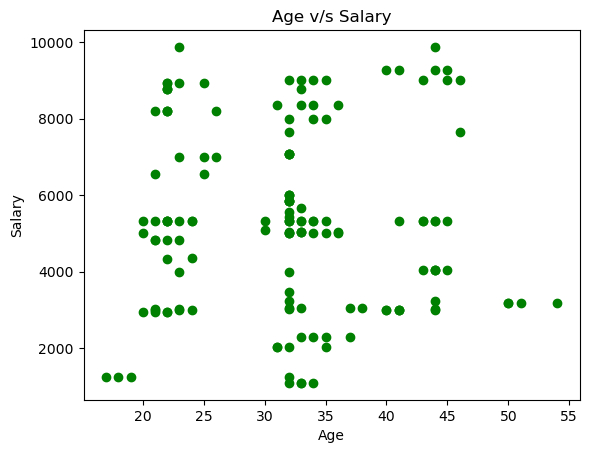

In [58]:
plt.scatter(df['Age'],df['Salary'],color='g')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age v/s Salary")
plt.show()


In [59]:
df['Place'].value_counts()

Place
Mumbai        51
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [60]:

x=df['Place'].value_counts().index
x


Index(['Mumbai', 'Calcutta', 'Chennai', 'Delhi', 'Cochin', 'Noida',
       'Hyderabad', 'Podicherry', 'Pune', 'Bhopal', 'Nagpur'],
      dtype='object', name='Place')

In [61]:
y=df['Place'].value_counts().values
y


array([51, 33, 14, 14, 13,  8,  8,  3,  2,  1,  1])

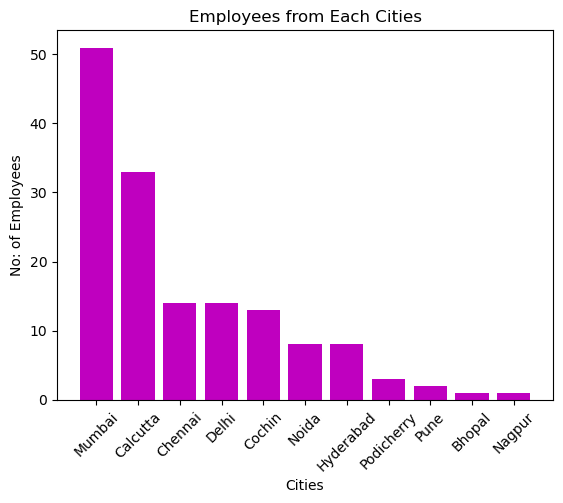

In [62]:
plt.bar(x,y,color='m')
plt.xlabel("Cities")
plt.ylabel("No: of Employees")
plt.title("Employees from Each Cities")
plt.xticks(rotation=45)
plt.show()

In [63]:
df.head(1)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,0


In [64]:
# the 'Gender' column is a 'Nominal categorical' column. so it couldn't be ranked like this.
# Assume M=0 & F=1

In [66]:
df['Gender'] = df['Gender'].replace(0, 'M')


In [68]:
df['Gender'] = df['Gender'].replace(1, 'F')


In [69]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,M
1,Infosys,30.0,5312.0,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M


In [70]:
df['Gender'].value_counts()


Gender
M    115
F     33
Name: count, dtype: int64

In [71]:
df.describe()


,Age,Salary
count,148.000000,148.000000
mean,31.966216,5312.391892
std,8.263859,2354.305009
min,17.000000,1089.000000
25%,23.000000,3149.250000
50%,32.000000,5312.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  148 non-null    object 
 1   Age      148 non-null    float64
 2   Salary   148 non-null    float64
 3   Place    148 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    object 
dtypes: float64(2), object(4)
memory usage: 7.1+ KB


In [73]:
# Here we have 4 categorical columns, "Company", "Place", "Country" & "Gender".
# Four of them are Nominal Categorical columns.
# since only one country's data is available,so we can skip the 'Country' column.


In [74]:
df.drop('Country',axis=1,inplace=True)
df


,Company,Age,Salary,Place,Gender
0,TCS,20.0,5312.0,Chennai,M
1,Infosys,30.0,5312.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,F
144,Infosys,22.0,8787.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


In [75]:
#Encoding Categorical datas using OneHotEncoding


In [76]:
df['Company'].unique()


array(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'], dtype=object)

In [77]:
df['Place'].unique()


array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [78]:
df['Gender'].unique()


array(['M', 'F'], dtype=object)

In [79]:
#use 'OneHotEncoder' to create dummy variables for each of the nominal categorical columns.


In [80]:
# import libraries 
from sklearn.preprocessing import OneHotEncoder


In [81]:
ohe=OneHotEncoder()


In [82]:
ohe
#created an object in the class()

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [83]:
#dummies into an array
df_array=ohe.fit_transform(df[['Company','Place','Gender']]).toarray()
df_array


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]], shape=(148, 19))

In [84]:
ohe.categories_


[array(['CTS', 'Congnizant', 'Infosys', 'Infosys Pvt Lmt', 'TCS',
        'Tata Consultancy Services'], dtype=object),
 array(['Bhopal', 'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad',
        'Mumbai', 'Nagpur', 'Noida', 'Podicherry', 'Pune'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [85]:
categories=[np.array(['Cognizant','Infosys','TCS']),
            np.array(['Bhopal','Calcutta','Chennai','Cochin','Delhi','Hyderabad','Mumbai','Nagpur','Noida','Pondicherry','Pune']),
            np.array(['F','M'])]


single_list=[innerlistone for main_array in categories for innerlistone in main_array]
single_list
#now it's in one list.

[np.str_('Cognizant'),
 np.str_('Infosys'),
 np.str_('TCS'),
 np.str_('Bhopal'),
 np.str_('Calcutta'),
 np.str_('Chennai'),
 np.str_('Cochin'),
 np.str_('Delhi'),
 np.str_('Hyderabad'),
 np.str_('Mumbai'),
 np.str_('Nagpur'),
 np.str_('Noida'),
 np.str_('Pondicherry'),
 np.str_('Pune'),
 np.str_('F'),
 np.str_('M')]

In [88]:
# Check the shape of df_array and length of single_list
print(df_array.shape)       # Should print (148, 19)
print(len(single_list))     # Should be 19

# If single_list is too short, extend it with placeholder names
while len(single_list) < df_array.shape[1]:
    single_list.append(f'Extra_Col{len(single_list)+1}')

# Now safely create the DataFrame
df_new = pd.DataFrame(df_array, columns=single_list)
df_new


(148, 19)
16


,Cognizant,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M,Extra_Col17,Extra_Col18,Extra_Col19
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
df_ml=pd.concat([df,df_new],axis=1)
df_ml


,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Bhopal,Calcutta,...,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M,Extra_Col17,Extra_Col18,Extra_Col19
0,TCS,20.0,5312.0,Chennai,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5312.0,Mumbai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,M,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,F,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144,Infosys,22.0,8787.0,Calcutta,F,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,Infosys,44.0,4034.0,Delhi,F,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146,TCS,33.0,5034.0,Mumbai,F,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
# Final encoded dataset for Machine Learning,
df_ml

,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Bhopal,Calcutta,...,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M,Extra_Col17,Extra_Col18,Extra_Col19
0,TCS,20.0,5312.0,Chennai,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5312.0,Mumbai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,M,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,M,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,F,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144,Infosys,22.0,8787.0,Calcutta,F,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,Infosys,44.0,4034.0,Delhi,F,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146,TCS,33.0,5034.0,Mumbai,F,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
# example for encoding using LabelEncoder

In [92]:
#save the cleaned dataset 'df' in external
df.to_csv('Employee_cleaned.csv',index=False)


In [93]:
#import library
from sklearn.preprocessing import LabelEncoder

In [94]:
label=LabelEncoder()
print(label)

LabelEncoder()


In [95]:
df_sample=pd.read_csv('Employee_cleaned.csv')
df_sample['Company']=label.fit_transform(df_sample['Company'])

In [96]:
df_sample

,Company,Age,Salary,Place,Gender
0,4,20.0,5312.0,Chennai,M
1,2,30.0,5312.0,Mumbai,M
2,4,35.0,2300.0,Calcutta,M
3,2,40.0,3000.0,Delhi,M
4,4,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
143,4,33.0,9024.0,Calcutta,F
144,2,22.0,8787.0,Calcutta,F
145,2,44.0,4034.0,Delhi,F
146,4,33.0,5034.0,Mumbai,F


In [97]:
#all numerical columns in the dataset to be standardized before ML model generation
# here we have 'Age' and 'Salary' columns only.

In [98]:
#cleaned dataset
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5312.0,Chennai,M
1,Infosys,30.0,5312.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,F
144,Infosys,22.0,8787.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


In [99]:
# using standard scaler

In [100]:
data=df.iloc[ : ,[1,2]]
data


,Age,Salary
0,20.0,5312.0
1,30.0,5312.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
143,33.0,9024.0
144,22.0,8787.0
145,44.0,4034.0
146,33.0,5034.0


In [101]:
#import libraries
from sklearn.preprocessing import StandardScaler


In [102]:
scaler=StandardScaler().fit(data)
print(scaler)


StandardScaler()


In [103]:
#standardize the data
data_scaled=scaler.transform(data)

In [104]:
print(data_scaled)

[[-1.45293481e+00 -1.67022793e-04]
 [-2.38737454e-01 -1.67022793e-04]
 [ 3.68361226e-01 -1.28386965e+00]
 [ 9.75459906e-01 -9.85532389e-01]
 [-1.08867561e+00 -5.59336296e-01]
 [ 4.10201811e-03 -1.33140204e-01]
 [ 4.10201811e-03  2.93055889e-01]
 [-1.08867561e+00  7.19251981e-01]
 [ 2.46941490e-01  1.14544807e+00]
 [ 1.58255859e+00  1.57164417e+00]
 [-1.08867561e+00 -1.67022793e-04]
 [ 2.46941490e-01 -1.79999312e+00]
 [ 1.58255859e+00 -1.67022793e-04]
 [-1.69577429e+00 -1.73819469e+00]
 [ 9.75459906e-01 -9.85532389e-01]
 [-1.08867561e+00 -9.85532389e-01]
 [-1.08867561e+00 -9.72746506e-01]
 [ 2.46941490e-01 -1.33140204e-01]
 [-1.21009534e+00 -1.67022793e-04]
 [ 4.10201811e-03 -1.67022793e-04]
 [ 6.11200698e-01 -9.66353564e-01]
 [ 2.18965727e+00 -9.07112308e-01]
 [-1.33151508e+00 -2.08150716e-01]
 [ 4.10201811e-03  2.22733534e-01]
 [ 4.10201811e-03  7.55052453e-01]
 [-1.08867561e+00  1.54735099e+00]
 [ 2.46941490e-01  1.29248573e+00]
 [ 1.58255859e+00  1.69268386e+00]
 [-1.08867561e+00  1

In [105]:
#check the mean, for a standarzide data it's = 0 or near,
print(data_scaled.mean(axis=0))

[-1.66533454e-16  1.12522604e-16]


In [107]:
#check the std, for a standarzide data it's = 1,
print(data_scaled.std(axis=0))


[1. 1.]


In [108]:
#convert it into dataframe-table format
scaled_data_set=pd.DataFrame(data_scaled,columns=data.columns)
scaled_data_set

,Age,Salary
0,-1.452935,-0.000167
1,-0.238737,-0.000167
2,0.368361,-1.283870
3,0.975460,-0.985532
4,-1.088676,-0.559336
...,...,...
143,0.125522,1.581873
144,-1.210095,1.480864
145,1.461139,-0.544846
146,0.125522,-0.118650


In [109]:
# using minmax scaler

In [110]:
data=df.iloc[ : ,[1,2]]
data

,Age,Salary
0,20.0,5312.0
1,30.0,5312.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
143,33.0,9024.0
144,22.0,8787.0
145,44.0,4034.0
146,33.0,5034.0


In [111]:
#import libraries
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler=MinMaxScaler().fit(data)
print(scaler)

MinMaxScaler()


In [113]:
#check min and max
scaler.data_min_

array([  17., 1089.])

In [114]:
scaler.data_max_

array([  54., 9876.])

In [115]:
data.describe()

,Age,Salary
count,148.000000,148.000000
mean,31.966216,5312.391892
std,8.263859,2354.305009
min,17.000000,1089.000000
25%,23.000000,3149.250000
50%,32.000000,5312.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [116]:
#check feature range
scaler.feature_range


(0, 1)

In [117]:
#standardize the data
data_scaled_mm=scaler.transform(data)

In [118]:
print(data_scaled_mm)

[[0.08108108 0.48059634]
 [0.35135135 0.48059634]
 [0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.40540541 0.44508934]
 [0.40540541 0.55889382]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.16216216 0.48059634]
 [0.45945946 0.        ]
 [0.75675676 0.48059634]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.13513514 0.48059634]
 [0.40540541 0.48059634]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.40540541 0.54011608]
 [0.40540541 0.68225788]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.51351351 0.44895869]
 [0.24324324 0.80949129]
 [0.48648649 0.90303858]
 [0.40540541 0.48059634]
 [0.48648649 0.48059634]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]


In [119]:
#convert it into dataframe-table format
mm_scaled_data_set=pd.DataFrame(data_scaled_mm,columns=data.columns)
mm_scaled_data_set

,Age,Salary
0,0.081081,0.480596
1,0.351351,0.480596
2,0.486486,0.137817
3,0.621622,0.217480
4,0.162162,0.331285
...,...,...
143,0.432432,0.903039
144,0.135135,0.876067
145,0.729730,0.335154
146,0.432432,0.448959


In [120]:
# The dataset is now completely preprocessed for Machine Learning Modeling 